<a href="https://colab.research.google.com/github/pedromperezc/CEIA/blob/master/AP/Desaf%C3%ADo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

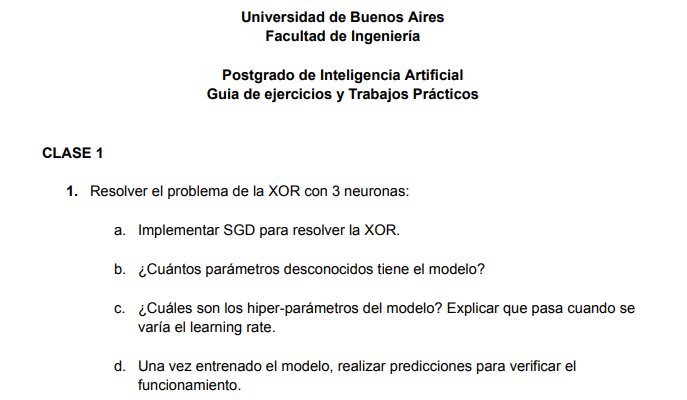

In [1]:
# import librería necesarias
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Array imput
X = np.array([[0,0,1,1],[0,1,0,1]])
X

array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [3]:
# Array ouptput
Y = np.array([[0],[1],[1],[0]])
Y

array([[0],
       [1],
       [1],
       [0]])

In [4]:
# Defino función sigmoid
def sigmoid(Z):
    sig = 1/(1+np.exp(-Z))
    return sig

In [5]:
# Numero de inputs
n_x = 2
# Numero de neurones en la capa de salida
n_y = 1
# Numero de neuronas en la capa oculta
n_h = 3

# Defino e inicializo con valores random los pesos W del layer 1
W1 = np.random.rand(n_h, n_x)

# Defino e inicializo con valores random los pesos W del layer 2
W2 = np.random.rand(n_h)

# Defino e inicializo con valores random los pesos b del layer 1
b1 = np.zeros(n_h)

# Defino e inicializo con valores random los pesos b del layer 2
b2 = np.zeros(n_y)

In [6]:
lr = 0.01
mse = []
epoch = 10000

for e in range(epoch):
    error = 0
    for i in range(4):
        # capa oculta:
        Z_1 = X[0, i] * W1[0, 0] + X[1, i] * W1[0, 1] + b1[0]
        A_1 = sigmoid(Z_1)
        Z_2 = X[0, i] * W1[1, 0] + X[1, i] * W1[1, 1] + b1[1]
        A_2 = sigmoid(Z_2)
        Z_3 = X[0, i] * W1[2, 0] + X[1, i] * W1[2, 1] + b1[2]
        A_3 = sigmoid(Z_3)
        # Capa output
        Z = A_1 * W2[0] + A_2 * W2[1] + A_3 * W2[2] + b2
        Y_p = Z
        # Loss
        error = error + np.square(Y[i] - Y_p)

        # Calcula las derivadas parciales y actualizo los pesos de la capa oculta
        W2[0] = W2[0] - lr * (-2 * ((Y[i] - Y_p)) * A_1)
        W2[1] = W2[1] - lr * (-2 * ((Y[i] - Y_p)) * A_2)
        W2[2] = W2[2] - lr * (-2 * ((Y[i] - Y_p)) * A_3)
        b2 = b2 - lr * (-2 * ((Y[i] - Y_p)))
        # Calcula las derivadas parciales y actualizo los pesos del leyer 1
        W1[0][0] = W1[0][0] - (lr * -2 * ((Y[i] - Y_p)) * W2[0] * A_1 * (1 - A_1) * X[0,i])
        W1[0][1] = W1[0][1] - (lr * -2 * ((Y[i] - Y_p)) * W2[0] * A_1 * (1 - A_1) * X[1,i])
        b1[0] = b1[0] - (lr * -2 * ((Y[i] - Y_p)) * W2[0] * A_1 * (1 - A_1))

        W1[1][0] = W1[1][0] - (lr * -2 * ((Y[i] - Y_p)) * W2[1] * A_2 * (1 - A_2) * X[0,i])
        W1[1][1] = W1[1][1] - (lr * -2 * ((Y[i] - Y_p)) * W2[1] * A_2 * (1 - A_2) * X[1,i])
        b1[1] = b1[1] - (lr * -2 * ((Y[i] - Y_p)) * W2[1] * A_2 * (1 - A_2))

        W1[2][0] = W1[2][0] - (lr * -2 * ((Y[i] - Y_p)) * W2[2] * A_3 * (1 - A_3) * X[0,i])
        W1[2][1] = W1[2][1] - (lr * -2 * ((Y[i] - Y_p)) * W2[2] * A_3 * (1 - A_3) * X[1,i])
        b1[2] = b1[2] - (lr * -2 * ((Y[i] - Y_p)) * W2[2] * A_3 * (1 - A_3))


    mse.append(error / 4)

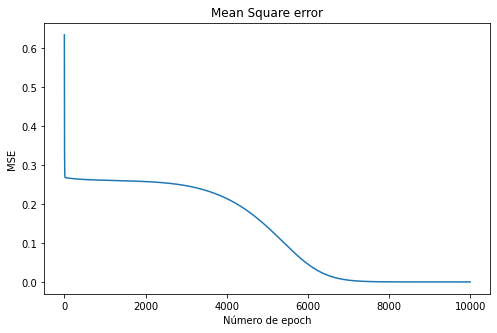

In [7]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes()
ax.set_title("Mean Square error")
ax.set_xlabel("Número de epoch")
ax.set_ylabel("MSE")
ax.plot(mse)

In [8]:
def predict(X, W1, W2, b1, b2):
  Z_1 = X[0] * W1[0,0] + X[1] * W1[0,1] + b1[0]
  A_1 = sigmoid(Z_1)
  Z_2 = X[0] * W1[1,0] + X[1] * W1[1,1] + b1[1]
  A_2 = sigmoid(Z_2)
  Z_3 = X[0] * W1[2,0] + X[1] * W1[2,1] + b1[2]
  A_3 = sigmoid(Z_3)
  Y_p = A_1 * W2[0] + A_2 * W2[1] + A_3 * W2[2] + b2
  return Y_p

In [9]:
predict([0,0], W1, W2, b1, b2)

array([0.00035446])

In [10]:
predict([0,1], W1, W2, b1, b2)

array([0.99954171])

In [11]:
predict([1,0], W1, W2, b1, b2)

array([0.99950087])

In [12]:
predict([1,1], W1, W2, b1, b2)

array([0.00063546])